<br>
<p style="text-align: left;"><img src='https://s3.amazonaws.com/weclouddata/images/logos/sunlife_logo.png' width='35%'></p>
<p style="text-align:left;"><font size='10'><b> Machine Learning - Decision Tree</b></font> </p><font color='#FC7307' size=6>Student Copy</font> </p>
<h2 align='left' > Sunlife Data Science Training </h2>

<h4 align='left'>  Prepared by: <img src='https://s3.amazonaws.com/weclouddata/images/logos/wcd_logo.png' width='15%'>

---
    
    
**Tree Visualization Dependencies**  

`
$ conda install pydotplus 
$ conda install graphviz  
`

If `conda install` doesn't work properly, try downloading graphviz and installing it manually. Graphviz can be downloaded from [https://www.graphviz.org/download/](https://www.graphviz.org/download/)


In [1]:
import os     
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'  # for windows users

## update the graphviz instalalation path accordingly in order to make tree viz work properly


# <font color='#347B98'> 1. Building a regression tree by hand

The **training data** used is a tiny dataset of [used vehicle sale prices](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv). Our goal is to **predict price** for testing data.

1. Read the data into a Pandas DataFrame.
2. Explore the data by sorting, plotting, or split-apply-combine (aka `group_by`).
3. Decide which feature is the most important predictor, and use that to create your first splitting rule.
    - Only binary splits are allowed.
4. After making your first split, split your DataFrame into two parts, and then explore each part to figure out what other splits to make.
5. Stop making splits once you are convinced that it strikes a good balance between underfitting and overfitting.
    - Your goal is to build a model that generalizes well.
    - You are allowed to split on the same variable multiple times!
6. Draw your tree, labeling the leaves with the mean price for the observations in that region.
    - Make sure nothing is backwards: You follow the **left branch** if the rule is true, and the **right branch** if the rule is false.

## $\Delta$ 1.1 - Load Dataset and Explore

In [2]:
# vehicle data
import pandas as pd
data = 'https://s3.amazonaws.com/weclouddata/datasets/random/vehicles_train.csv' # you may need to change the directory 
train = pd.read_csv(data)

In [3]:
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


## $\Delta$ 1.2 - Prediction using `Mean`

### $\delta$ Use average price as the prediction

In [4]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.price.mean()
train[:10]

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


### $\delta$ Evaluate the performance

In [5]:
# calculate RMSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


5936.981985995983

### $\delta$ `Mean` Prediction with a split

In [6]:
# define a function that calculates the RMSE for a given split of miles
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_mileage_price, higher_mileage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [7]:
# calculate RMSE for tree which splits on miles < 50000
print ('RMSE:', mileage_split(50000))
train[:5]

RMSE: 3984.0917425414564


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,15000.000000
1,14000,2010,30000,2,car,15000.000000
2,13000,2010,73500,4,car,4272.727273
3,9500,2009,78000,4,car,4272.727273
4,9000,2007,47000,4,car,15000.000000


In [8]:
# calculate RMSE for tree which splits on miles < 100000
print ('RMSE:', mileage_split(100000))
train[:5]

RMSE: 3530.146530076269


,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,12083.333333
1,14000,2010,30000,2,car,12083.333333
2,13000,2010,73500,4,car,12083.333333
3,9500,2009,78000,4,car,12083.333333
4,9000,2007,47000,4,car,12083.333333


### $\delta$ Check all possible mileage splits (exaustive approach)

In [9]:
# check all possible mileage splits
mileage_range = range(train.miles.min(), train.miles.max(), 1000)
RMSE = [mileage_split(miles) for miles in mileage_range]

In [10]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0,0.5,'RMSE (lower is better)')

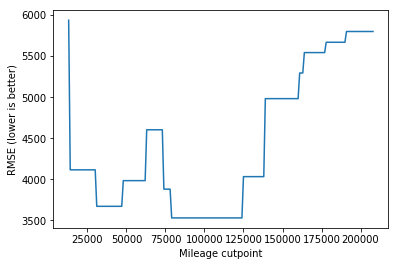

In [11]:
# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(mileage_range, RMSE)
plt.xlabel('Mileage cutpoint')
plt.ylabel('RMSE (lower is better)')

**Recap:** Before every split, this process is repeated for every feature, and the feature and cutpoint that produces the lowest MSE is chosen.

In [11]:
# Building a regression tree by hand (Optional)

########################
## your code here
########################









# <font color='#347B98'> 2. Building a regression tree using Scikit-learn


## $\Delta$ 2.1 - Prepare data

In [12]:
# encode car as 0 and truck as 1
# {'car': 0, 'truck': 1}

train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [13]:
# define X and y
feature_cols = ['year', 'miles', 'doors', 'vtype']
X = train[feature_cols]
y = train.price

## $\Delta$ 2.2 - Instantiate the model
> Hint: `sklearn.tree.DecisionTreeRegressor`

In [14]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=2018)
treereg

/usr/lib64/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2018, splitter='best')

## $\Delta$ 2.3 - Fit the modeling using Cross-validation

In [15]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')

np.mean(np.sqrt(-scores))

2493.2935565153757

## $\Delta$ 2.4 Tuning a regression tree

Let's try to reduce the RMSE by tuning the **max_depth** parameter:

In [16]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=5, random_state=2018) ## TODO: change the value of max_depth
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2493.2935565153757

Or, we could write a loop to try a range of values:

In [17]:
# list of values to try
max_depth_range = range(1, 10)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
# TODO: write a loop and store the RMSE to 'RMSE_scores'

for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0,0.5,'RMSE (lower is better)')

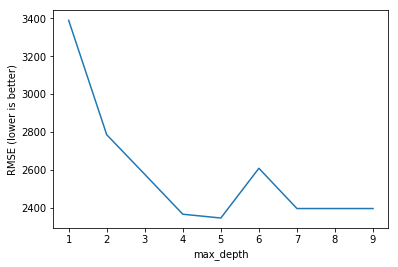

In [18]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [19]:
# max_depth=5 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

## $\Delta$ 2.5 - Feature Importance

In [20]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


## $\Delta$ 2.6 - Creating a tree diagram

In [21]:
treereg

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
from IPython.display import Image
import pylab, pydotplus
from sklearn.externals.six import StringIO  

%matplotlib inline

dot_data = StringIO() 
export_graphviz(treereg, 
                out_file=dot_data, 
                feature_names=feature_cols, 
                class_names=['price'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree_vehicles.pdf")   ## the graph is exported to a pdf file
Image(graph.create_png())

## $\Delta$ 2.7 - Making predictions for the testing data

In [31]:
# read the testing data
vehicles_data = 'https://s3.amazonaws.com/weclouddata/datasets/random/vehicles_test.csv'
test = pd.read_csv(vehicles_data)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


**Question:** Using the tree diagram above, what predictions will the model make for each observation?

In [32]:
# use fitted model to make predictions on testing data

X_test = test[feature_cols]
y_test = test.price
print(np.array(y_test))

y_pred = treereg.predict(X_test)
print(y_pred)

[ 3000  6000 12000]
[ 4000.  5000. 13500.]


In [33]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

In [34]:
# calculate RMSE for your own tree!
y_test = [3000, 6000, 12000]
y_pred = [0, 0, 0] # fill in your prediction using the model in Part 1
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

7937.253933193771

# <font color='#347B98'> 3. Classification Trees



## $\Delta$ 3.1 - Building a classification tree in scikit-learn

Build a classification tree using the Titanic data

### Load the Titanic Data

In [36]:
# read in the data
titanic_data = 'https://s3.amazonaws.com/weclouddata/datasets/random/titanic.csv'
titanic = pd.read_csv(titanic_data, sep=';')

- **Survived:** 0=died, 1=survived (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
    - What will happen if the tree splits on this feature?
- **Sex:** 0=female, 1=male
- **Age:** numeric value
- **Embarked:** C or Q or S

### Categorical Feature Encoding

In [37]:
# encode female as 0 and male as 1
titanic['sex'] = titanic.sex.map({'female':0, 'male':1})

### Missing Imputation

In [38]:
# fill in the missing values for age with the median age
titanic.age.fillna(titanic.age.median(), inplace=True)

### Create Dummies

In [39]:
# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.embarked, prefix='embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

In [40]:
# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,embarked_Q,embarked_S
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0,1
1,1,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0,1


### Train/Test Split

In [41]:
# define X and y
feature_cols = ['pclass', 'sex', 'age', 'embarked_Q', 'embarked_S']
X = titanic[feature_cols]
y = titanic.survived

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=2018)

### Instantiate the `DecisionTreeClassifier`

In [44]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)

### Modeling Fitting

In [45]:
treeclf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Plotting Classification Tree

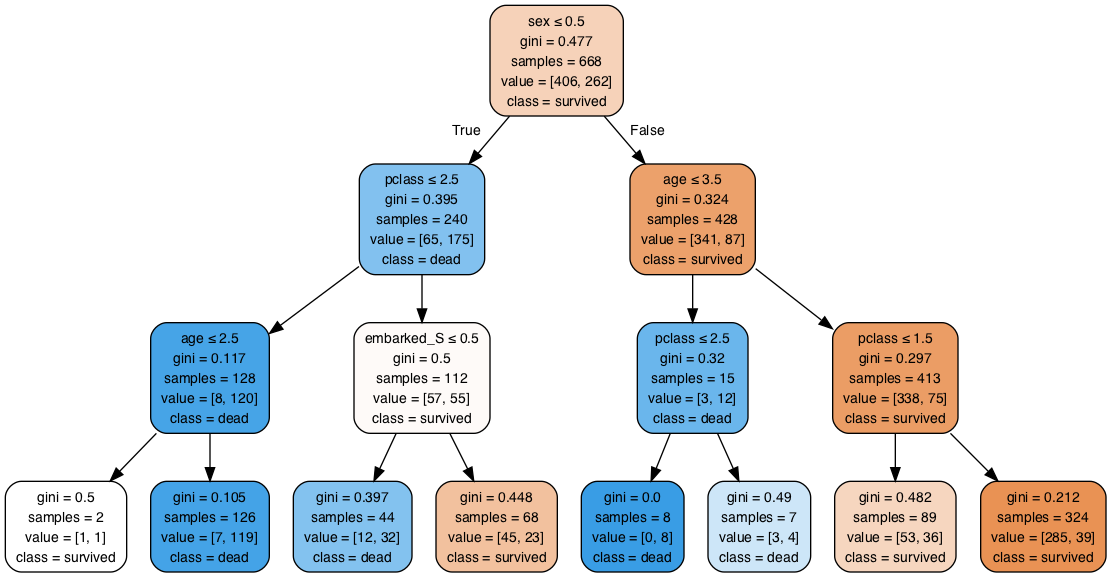

In [37]:
dot_data = StringIO() 
export_graphviz(treeclf, 
                out_file=dot_data, 
                feature_names=feature_cols, 
                class_names=['survived','dead'],
                filled=True, 
                rounded=True,  
                leaves_parallel=False,
                rotate=False,
                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("tree_titanic.pdf")   ## the graph is exported to a pdf file
Image(graph.create_png())


Notice the split in the bottom right: the **same class** is predicted in both of its leaves. That split didn't affect the **classification error rate**, though it did increase the **node purity**, which is important because it increases the accuracy of our predicted probabilities.

### Plot Feature Importance

In [38]:
# compute the feature importances
important_features = pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

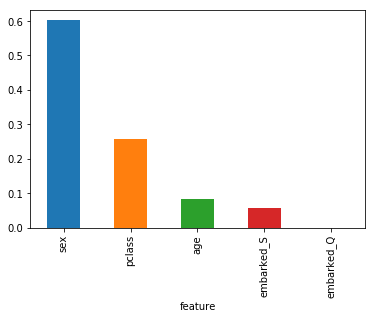

In [39]:
important_features.sort_values(by='importance', ascending=False).set_index('feature')['importance'].plot(kind='bar')

# <font color='#347B98'> 4. Exercise - Churn Modeling with Decision Trees

1. Fit a decision tree model on the telecom churn dataset (code provided)
2. Plot the decision tree to interprete the model
3. Plot variable importance 

### 4.1 - Data Preparation

#### Load data

In [46]:
churn_df = pd.read_csv('https://s3.amazonaws.com/weclouddata/datasets/random/churn.csv')
col_names = churn_df.columns.tolist()
print ("Column names:")
print (col_names)

Column names:
['State', 'Account Length', 'Area Code', 'Phone', "Int'l Plan", 'VMail Plan', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


#### Define target

In [47]:
churn_df['Churn'] = churn_df.Churn.map({True: 1, False: 0})

In [48]:
to_drop = ['State','Area Code','Phone', 'Churn']
churn_X = churn_df.drop(to_drop,axis=1)

#### Prepare features and target

In [49]:
yes_no_cols = ["Int'l Plan","VMail Plan"]
churn_X[yes_no_cols] = churn_X[yes_no_cols] == 'yes'

In [50]:
churn_y = churn_df['Churn']

#### Train/test split

In [51]:
train_X, test_X, train_y, test_y = train_test_split(churn_X, churn_y, test_size=0.3, shuffle=True, random_state=2018)

#### Fit a decision tree classifier


In [52]:
################################
## Your Code Below
################################

from sklearn.tree import DecisionTreeClassifier



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

#### Make prediction for train and test data

In [53]:
################################
## Your Code Below
################################



In [54]:
from sklearn.metrics import classification_report

print(classification_report(train_y, train_y_pred))
print(classification_report(test_y, test_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2003
           1       0.85      0.43      0.57       330

   micro avg       0.91      0.91      0.91      2333
   macro avg       0.88      0.71      0.76      2333
weighted avg       0.90      0.91      0.90      2333

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       847
           1       0.80      0.48      0.60       153

   micro avg       0.90      0.90      0.90      1000
   macro avg       0.86      0.73      0.77      1000
weighted avg       0.90      0.90      0.89      1000



#### Plot the tree

In [ ]:
################################
## Your Code Below
################################




#### Plot variable importance

In [ ]:
################################
## Your Code Below
################################

